In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import torch
from PIL import Image
from torch.autograd import Variable

from models.mtcnn import PNet, RNet, ONet
from utils.box_utils import nms, calibrate_box, get_image_boxes, convert_to_square
from utils.first_stage import run_pnet
from utils.second_stage import run_rnet
from utils.third_stage import run_onet
#from utils.first_stage_org import run_first_stage
from utils.visualization_utils import show_bboxes

# Load models

In [2]:
pnet = PNet()
rnet = RNet()
onet = ONet()
onet.eval();

# Set hyperparameters

In [3]:
# if this value is too low the algorithm will use a lot of memory
min_face_size = 40.0  

# for probabilities
thresholds = [0.6, 0.7, 0.8]

# for NMS
nms_thresholds=[0.7, 0.7, 0.7]

# Load an image

In [4]:
image = Image.open('office5.jpg')
#image = Image.open('./data/test_anchors/n000078/0023_01.jpg')
#image = Image.open('./0008_01.jpg')
#image = image.resize((250,200))
img_w, img_h = image.size
scale = min(720. / img_h, 1280. / img_w)
print(scale)
if scale < 1.0:
    image = image.resize((int(1280*scale),int(720*scale)))
#image

1.92


# P-Net

number of bounding boxes: 226


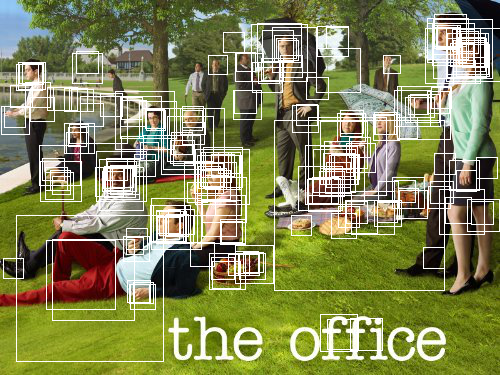

In [5]:

bounding_boxes = run_pnet(image, pnet, threshold=thresholds[0], min_face_size=20) #[]
show_bboxes(image, bounding_boxes)

In [ ]:
img_boxes = get_image_boxes(bounding_boxes, image, size=24)
bounding_boxes = run_rnet(rnet, img_boxes, thresholds, bounding_boxes)
show_bboxes(image, bounding_boxes)

In [ ]:
img_boxes = get_image_boxes(bounding_boxes, image, size=48)
bounding_boxes, landmarks = run_onet(onet, img_boxes, thresholds, bounding_boxes)
show_bboxes(image, bounding_boxes, landmarks)

# R-Net